# Impact of resolution and numeric schemas over trajectories predictions quality

In [1]:
import numpy as np
import xarray as xr
from math import *
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import stagem1.int_temp_integration as iti
import xsimlab as xs
from scipy.stats import norm
import seaborn as sns

In [2]:
x=iti.SetUp()
y=sti.SetUp()

In [31]:
x.out_ds

<xarray.Dataset>
Dimensions:                 (a: 100, otime: 11, t: 150, time: 12, x: 410)
Coordinates:
  * a                       (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime                   (otime) int64 0 7200 14400 ... 57600 64800 72000
  * t                       (t) float64 -7.2e+03 -3.6e+03 ... 5.292e+05
  * time                    (time) int64 0 7200 14400 ... 64800 72000 79200
  * x                       (x) float64 -1.037e+05 -1.027e+05 ... 3.053e+05
    otime_day               (otime) float64 0.0 0.08333 0.1667 ... 0.75 0.8333
    t_day                   (t) float64 -0.08333 -0.04167 0.0 ... 6.083 6.125
    x_km                    (t) float64 -7.2 -3.6 0.0 3.6 ... 522.0 525.6 529.2
Data variables: (12/22)
    init__N                 int64 100
    init__maxi              float64 2e+05
    init__mini              int64 0
    position__p             (otime, a) float64 0.0 2.02e+03 ... 2.074e+05
    v_field__advected       int64 1
    v_field__k              float64 6.283e-05
    ...                      ...
    velocity__v             (otime, a) float64 0.2 0.1992 ... 0.06141 0.04913
    position_km             (otime, a) float64 0.0 2.02 4.04 ... 205.2 207.4
    displacement            (otime, a) float64 0.0 0.0 ... 7.194e+03 7.361e+03
    displacement_km         (otime, a) float64 0.0 0.0 0.0 ... 7.03 7.194 7.361
    velocity_field          (t, x) float64 0.1652 0.1603 ... 0.09121 0.08498
    CFL                     float64 1.44

In [5]:
h2s = sti.h2s
time = np.arange(0, 5*24*h2s, h2s)
otime = time[:-1]

x.update_clock(time=time, otime=otime)
y.update_clock(time=time, otime=otime)

In [5]:
x['dt'], x['dx']

(3600.0, 1000.0)

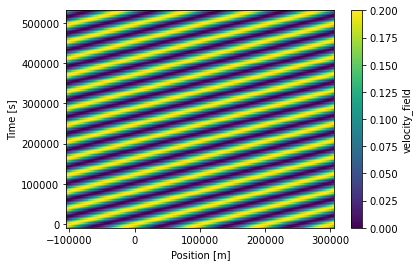

In [8]:
x['VF'].plot()

# Comparaison de la vitesse interpolée et de la vitesse analytique en fonction du pas de temps Lagrangien $\delta t$
`iti.run_DT(DT,Tmax=24,a=5, xlim=None, **args)`  

Arguments:
- `DT`: liste des pas Lagrangien $\delta t$ qu'on veut explorer
- `Tmax`: durée en heure sur laquelle on veut les plots
- `xlim`: limite de l'axe des temps
- `**args`: arguments pour iti.SetUp    

Sortie: pour chaque $\delta t$ en colonne
* Première ligne: vitesse interpolée et vitesse analytique sur la trajectoire
* Seconde ligne: différence vitesse interpolée - vitesse analytique
* Troisième ligne: distance spatiale au point de la grille le plus proche (=minimum entre x['p']%x['dx'] et x['dx']-x['p']%x['dx'])
* Quatrième ligne: distance temporelle au point de la grille le plus proche (=minimum entre x['otime']%x['dt'] et x['dt']-x['otime']%x['dt'])
* Cinquième ligne: multiplication de la vitesse interpolée à laquelle on retire le courant moyen et de la distance temporelle au point de la grille le plus proche  

Les paramètres fixent sont: $U_m=U_w=0.1 m/s$, $dx=1km$, $dt=1h$, w=iti.w2 (période 12h) et k=iti.k2 (longueur d'onde 100km)  


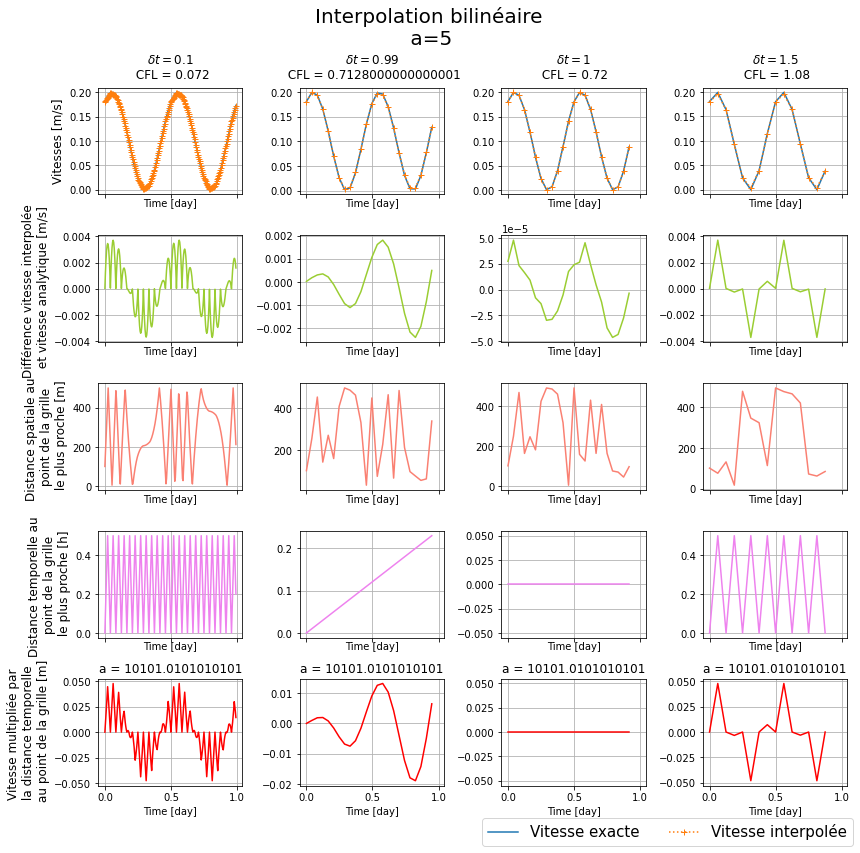

In [2]:
iti.run_DT([0.1,0.99, 1,1.5])

* la multiplication de la vitesse interpolée à laquelle on retire le courant moyen et de la distance temporelle au point de la grille le plus proche donne une bonne idée de la forme de l'erreur en fonction du temps -> facteur de proportionnalité ???, importance de la distance spatiale au point???

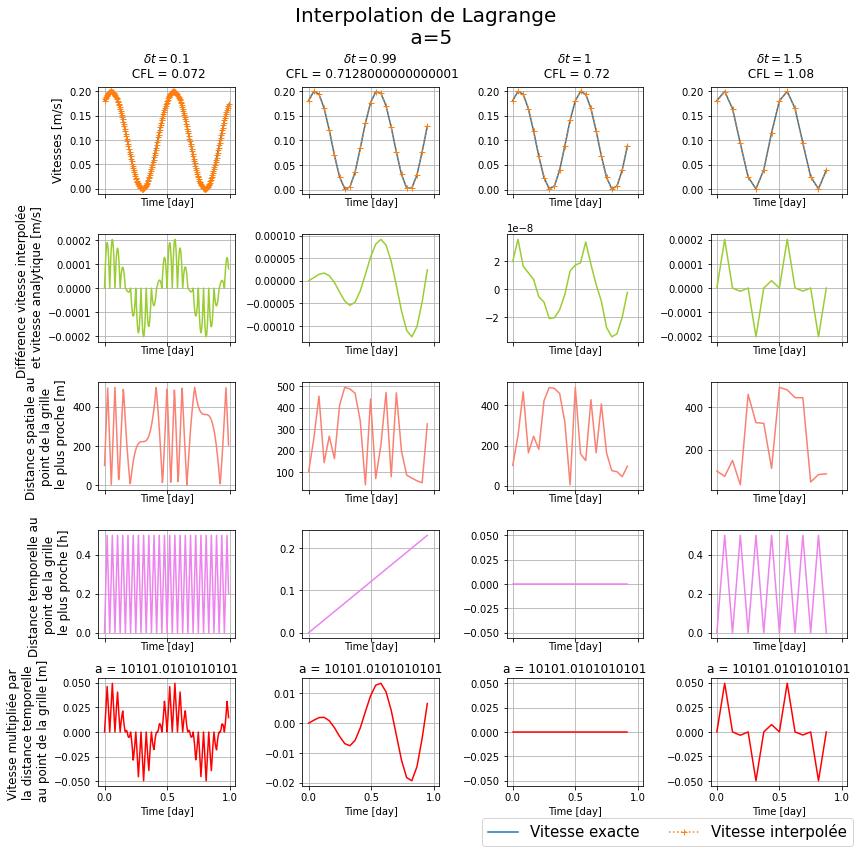

In [4]:
iti.run_DT([0.1,0.99, 1,1.5], inter_method='lagrange')

* idem que pour l'interpolation bilinéaire, mais valeurs de l'erreur environ vingt fois inférieures (bilinéaire 0.004/ lagrange 0.0002).

### Visualisation de la trajectoire sur la grille

(0.0, 1.0)

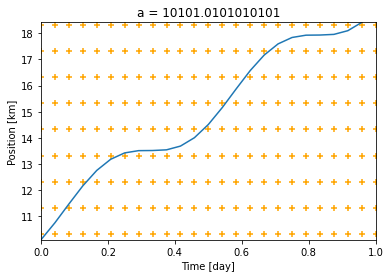

In [2]:
x=iti.SetUp()
p=x['p_km'].isel(a=5).where(x.out_ds.otime<24*3600, drop=True)
p.plot(x='otime_day')
for t in x.out_ds.t_day.values :
    plt.scatter(t*np.ones_like(x.out_ds.x_km.values),x.out_ds.x_km.values, marker="+", facecolors='orange')
plt.ylim(p.min(), p.max())
plt.xlim(0,1)

